<table border="0" style="width:100%">
 <tr>
    <td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/c/ce/IE_University_logo.svg" width=150>
     </td>
    <td><div style="font-family:'Courier New'">
            <div style="font-size:25px">
                <div style="text-align: right"> 
                    <b> MASTER IN BIG DATA</b>
                    <br>
                    Machine Learning II
                    <br><br>
                    <em> Santiago Ramírez Planter </em>
                </div>
            </div>
        </div>
    </td>
 </tr>
</table>

# House Price Prediction Model

This notebook details the steps taken to develop, evaluate, and optimize a machine learning model for predicting house prices.

The goal of this project is to build a predictive model using the Ames Housing dataset. The workflow includes data exploration, preprocessing, feature engineering, model training, and evaluation.

## 1. Data Loading and Exploration
The necessary libraries for data manipulation, visualization, and machine learning are imported, and visualization preferences are configured.


### 1.1 Importing Libraries and Setting Up Environment

To begin, we import the necessary libraries for data analysis, visualization, and machine learning.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import kagglehub
import joblib
import statsmodels.api as sm

# Setting visualization preferences
plt.style.use('seaborn')
sns.set_palette('viridis')



C:\Users\santi\AppData\Local\Temp\ipykernel_9980\3012013608.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1.2 Downloading the Housing Dataset

In this step, we use the `kagglehub` library to download the Housing dataset, which will be used for our house price estimation model.

In [2]:
# Download the Housing dataset
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\santi\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1


### 1.3 Initial Data Exploration and Preparation

The dataset is loaded into a pandas DataFrame using the `read_csv` function, specifying the path to the downloaded file. To understand the dataset's structure and characteristics, we perform several exploratory steps:

- Displaying the structure and summary statistics.
- Checking for duplicates and missing values.
- Classifying numerical and categorical columns


In [3]:
# Replace with the correct path if necessary
data = pd.read_csv(f"{path}/Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.shape

(545, 13)

In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.loc[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [8]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
numerical_list = [x for x in data.columns if data[x].dtype in ('int64','float64')]
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [10]:
categorical_list = [x for x in data.columns if data[x].dtype =='object']
for x in categorical_list: print(x)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


In [11]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## 2. Data Visualization

### 2.1Exploratory Data Visualization and Correlation Analysis

To better understand the dataset, we perform various visualizations and analyses for the numerical features. Here's an overview:

- Histograms with KDE for numerical features.
- Scatter plots to explore relationships with the target variable (`price`).
- Pairplot to visualize feature interactions.
- Correlation heatmap to identify relationships among numerical features.
- Boxplots to detect potential outliers.

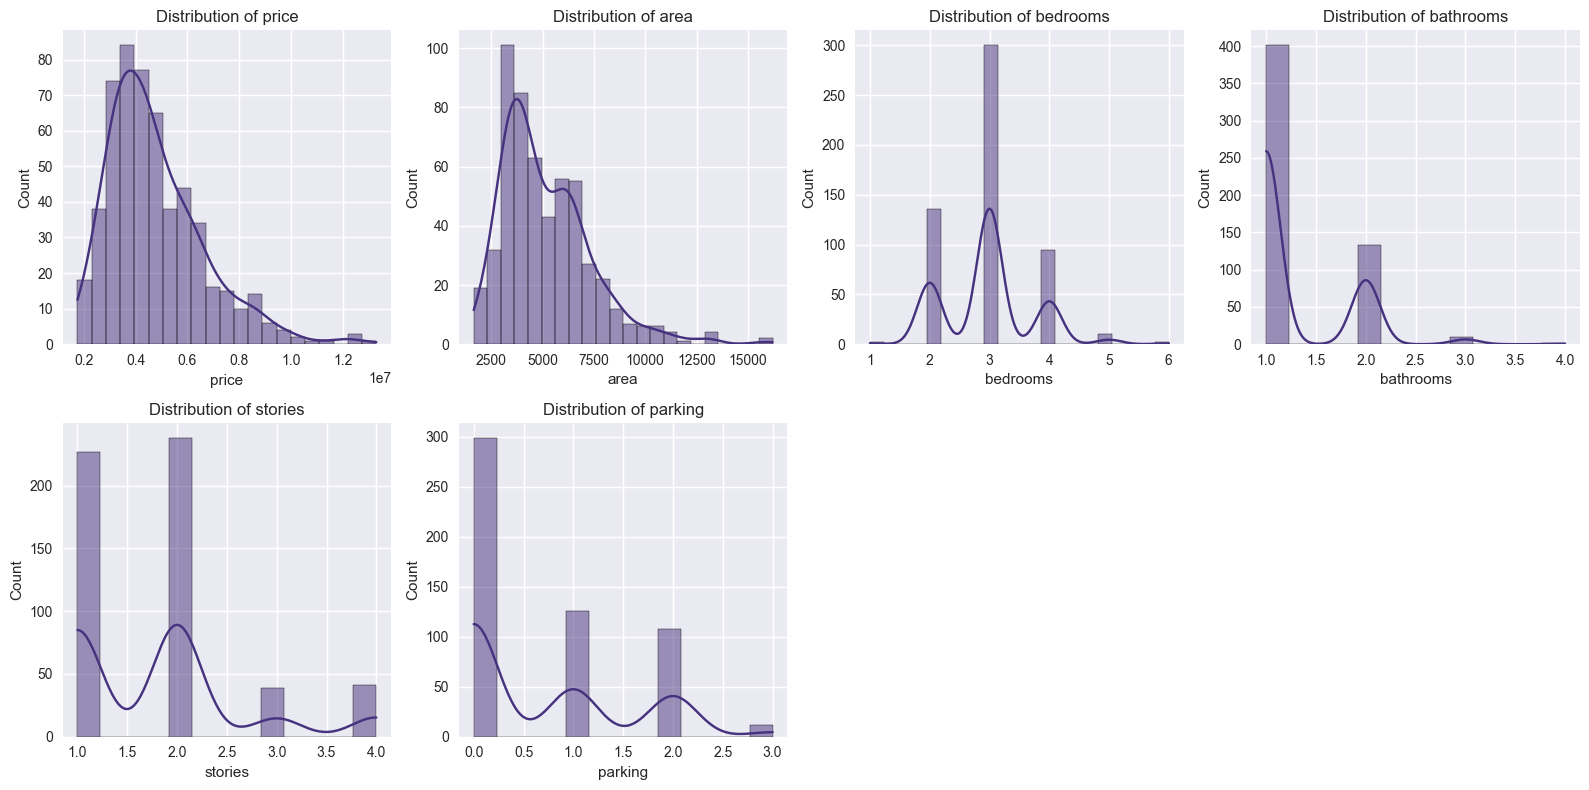

In [12]:
# Define numeric columns and calculate number of rows and columns needed
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)
num_rows = (num_columns // 4) + (num_columns % 4 > 0)  # 4 columns per row

# Set the figure size
plt.figure(figsize=(16, 4 * num_rows))

# Loop through each numeric column and create a histogram with KDE
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

# Ensure plots are neatly spaced without overlapping
plt.tight_layout()
plt.show()

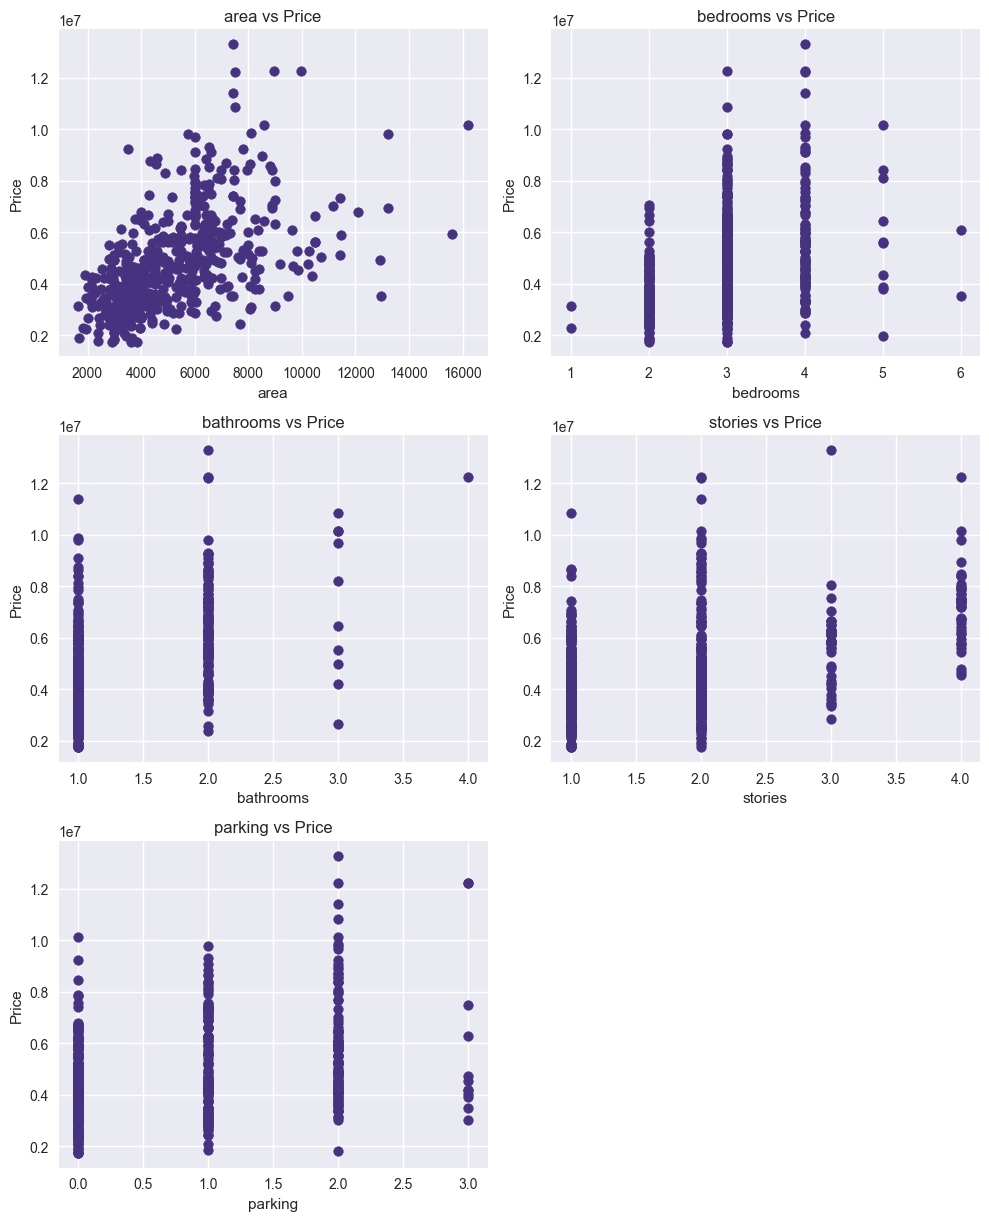

In [13]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

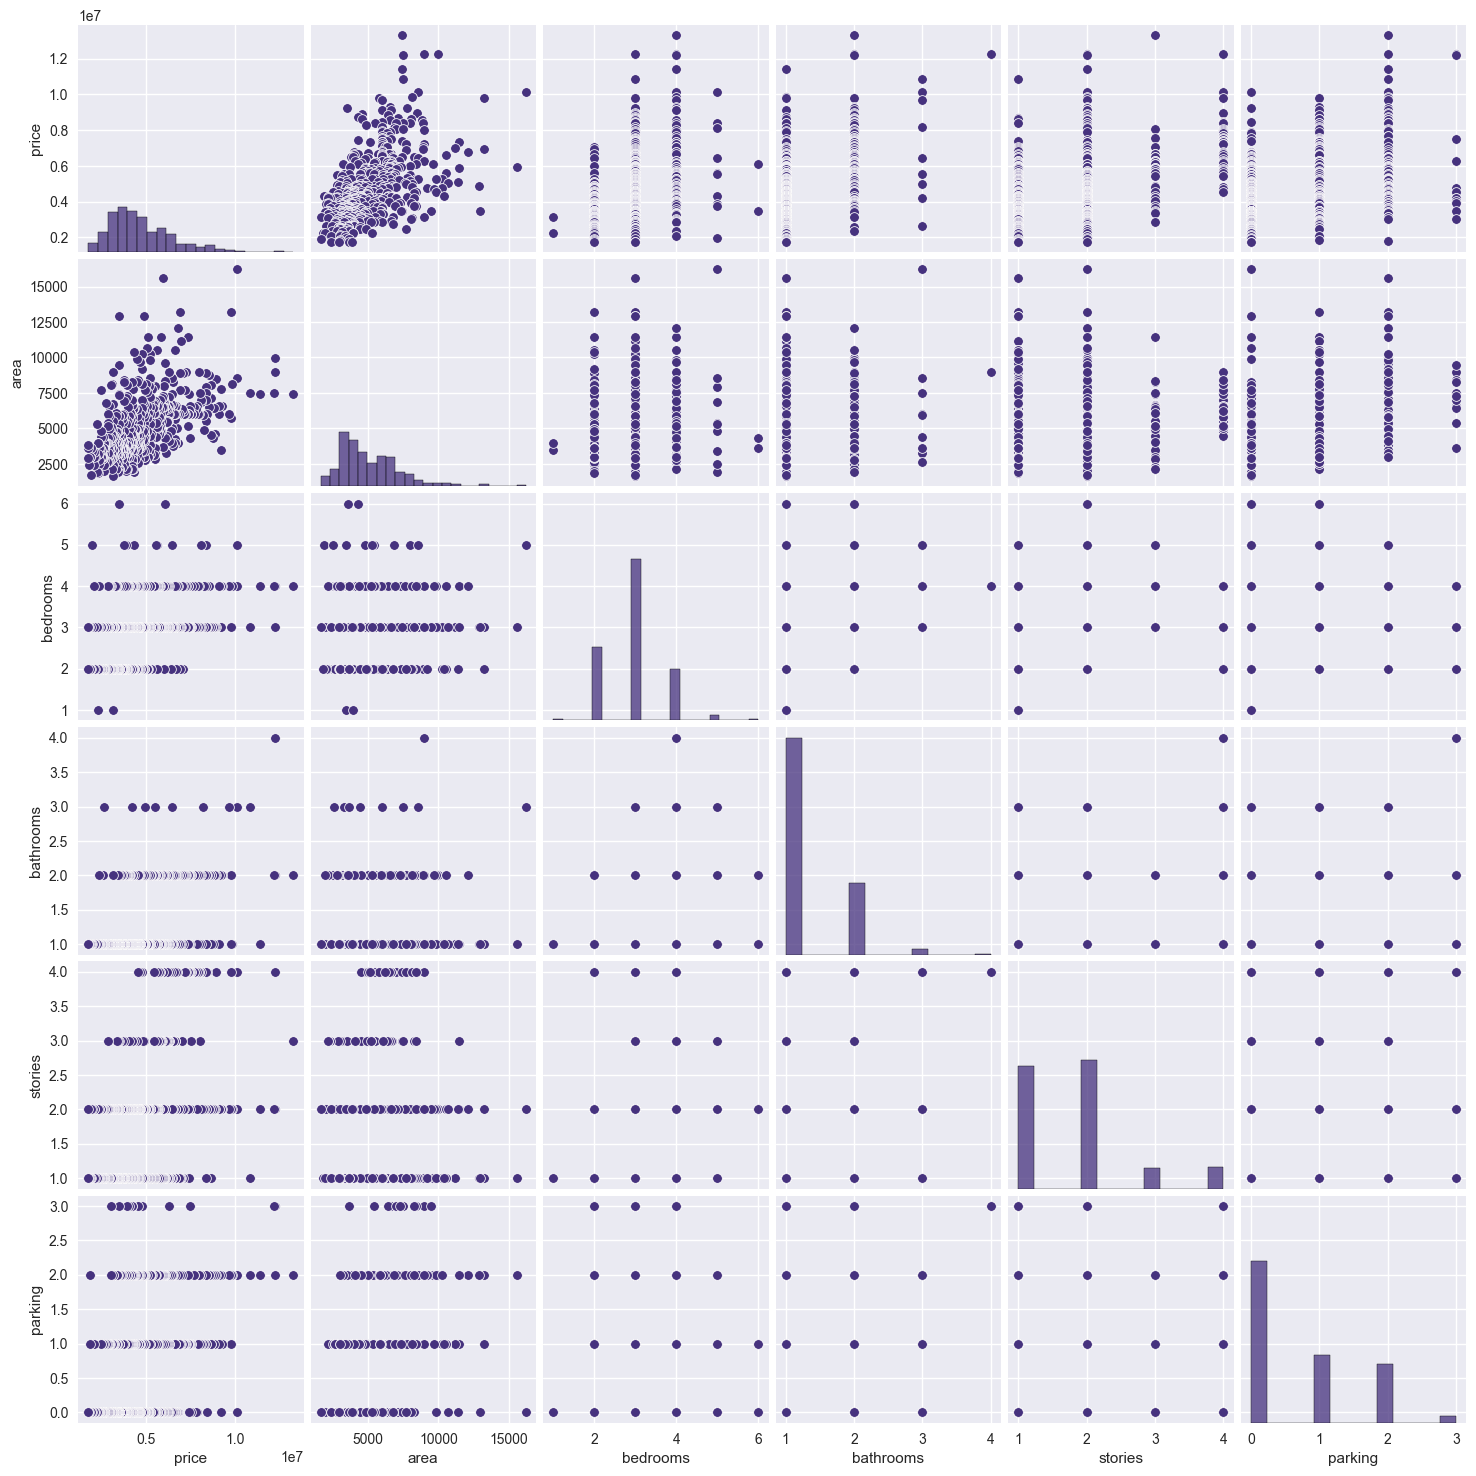

In [14]:
sns.pairplot(data)
plt.show()

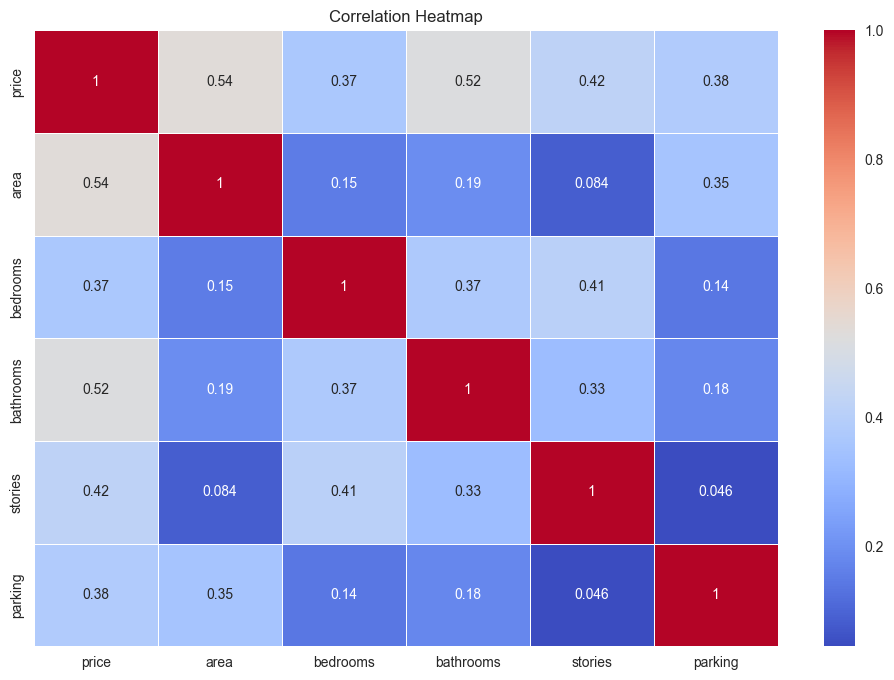

In [15]:
cor_matrix= data[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

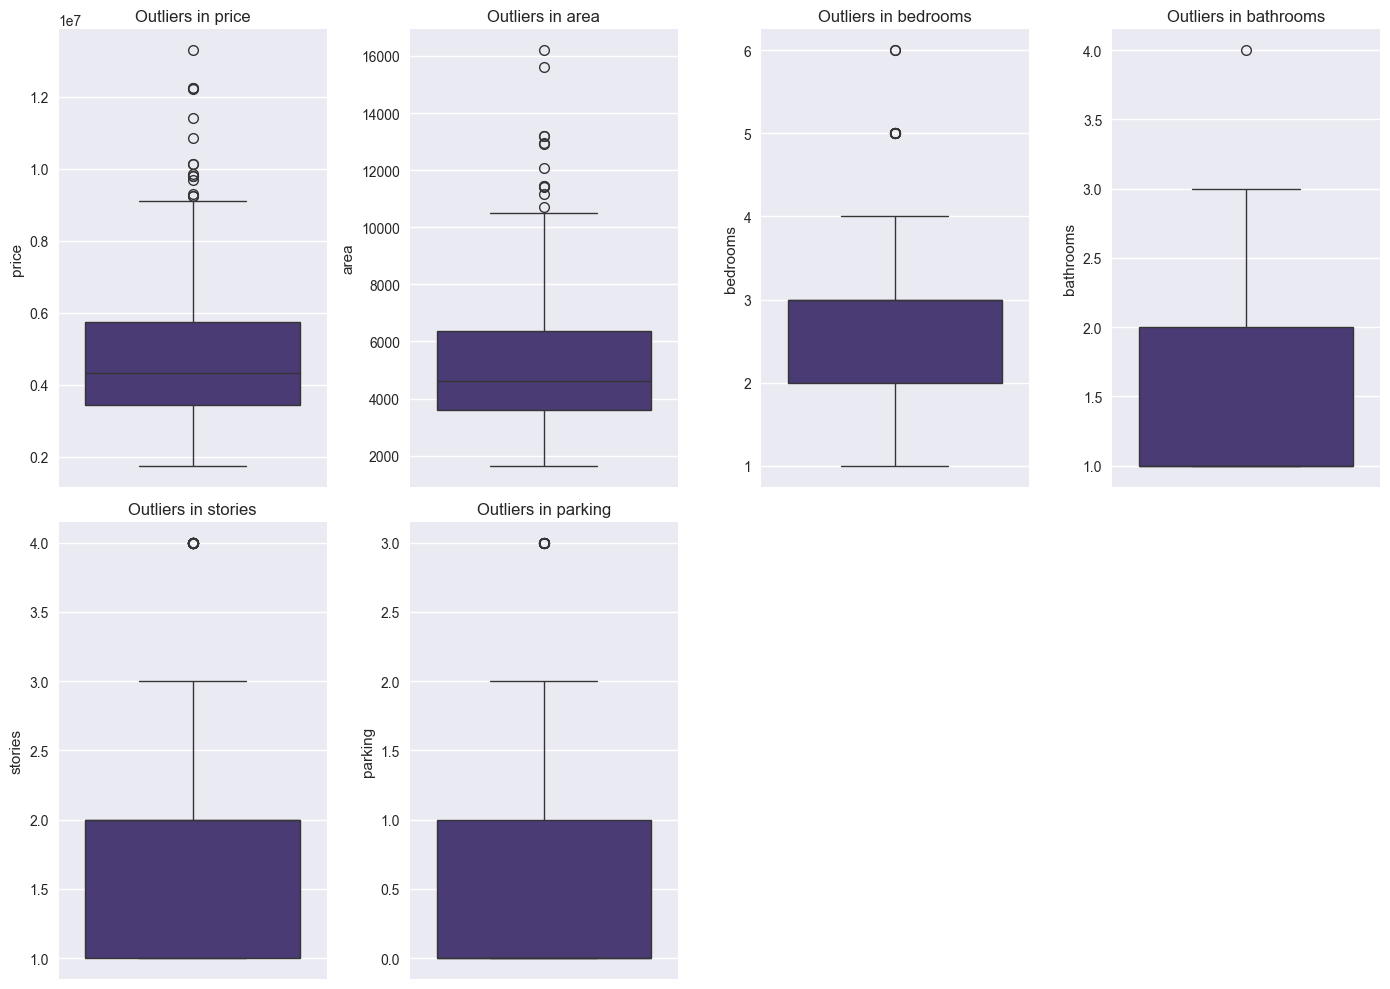

In [16]:
# Boxplots for Outlier Analysis
plt.figure(figsize=(14, 10))
num_columns = len(numeric_columns)
num_rows = (num_columns // 4) + (num_columns % 4 > 0)

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=data[col])
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()


## 3. Data Preprocessing

### 3.1 Data Preprocessing and Splitting

Before building the model, the dataset is prepared by separating the target variable and splitting the data into training and testing sets:

- Separating the target variable (`price`) and features.
- Splitting the data into training and testing sets

In [17]:
# Data Preprocessing and Model Pipeline Setup
# Separate target variable
X = data.drop(columns=['price'])
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2 Feature Categorization

Features are categorized into numerical and categorical columns for targeted preprocessing.

In [18]:
# Define categorical and numerical columns
categorical_columns = ['mainroad', 'guestroom', 'hotwaterheating', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

### 3.3 Preprocessor Definition

A `ColumnTransformer` is defined to handle:
- Standardization of numerical columns.
- One-hot encoding of categorical columns.


In [19]:
# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

## 4. Feature Selection and Model Setup

### 4.1 Feature Selection and Model Definition

The `SelectKBest` method is used to select the top features based on statistical significance. Multiple regression models, including linear regression, Ridge, Lasso, decision trees, random forests, and support vector regressors, are defined for evaluation.

In [20]:
# Set k to be the minimum of 5 or the number of features in X_train after preprocessing
k = min(5, X_train.shape[1])

# Define the feature selector with the adjusted k
feature_selector = SelectKBest(score_func=f_regression, k=k)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

## 5. Pipeline Creation

### 5.1 Model Pipelines Setup

Pipelines are created for each model to streamline preprocessing, feature selection, and training.


In [21]:
# Create pipelines for each model
pipelines = {
    name: Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector),
        ('model', model)
    ])
    for name, model in models.items()
}

## 6. Model Evaluation

### 6.1 Model Evaluation and Results Compilation

Each pipeline is evaluated using cross-validation. Metrics such as R², MSE, and MAE are computed to compare model performance, and results are compiled into a summary table.


In [22]:
# Store results
results = []

# Evaluate each model
for name, pipeline in pipelines.items():
    # Cross-validation on training data
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    # Fit the model
    pipeline.fit(X_train, y_train)
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        'Model': name,
        'Cross-Validated R2 Mean': cv_scores.mean(),
        'Test R2': r2,
        'MSE': mse,
        'MAE': mae
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df


,Model,Cross-Validated R2 Mean,Test R2,MSE,MAE
0,Linear Regression,0.560715,0.583727,2.104080e+12,1.100985e+06
1,Ridge Regression,0.560935,0.583443,2.105518e+12,1.101183e+06
2,Lasso Regression,0.560715,0.583727,2.104081e+12,1.100986e+06
3,Decision Tree,0.080667,0.385799,3.104522e+12,1.297922e+06
4,Random Forest,0.456157,0.553570,2.256510e+12,1.091497e+06
5,Support Vector Regressor,-0.064924,-0.101561,5.567917e+12,1.763885e+06


In [23]:
best_model_name = results_df.sort_values('Cross-Validated R2 Mean', ascending=False).iloc[0]['Model']
print(f"Selected Best Model: {best_model_name}")

Selected Best Model: Ridge Regression


### 6.2 Hyperparameter Tuning for the Best Model

The best-performing model is fine-tuned using `GridSearchCV` with defined hyperparameter grids.

In [24]:
# Retrieve the chosen model's pipeline
best_pipeline = pipelines[best_model_name]

if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Support Vector Regressor':
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__epsilon': [0.1, 0.2, 0.5],
        'model__kernel': ['linear', 'rbf']
    }
elif best_model_name == 'Decision Tree':
    param_grid = {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Ridge Regression':
    param_grid = {
        'model__alpha': [0.1, 1, 10, 50, 100]
    }
elif best_model_name == 'Lasso Regression':
    param_grid = {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10]
    }
elif best_model_name == 'Linear Regression':
    param_grid = {}  # Linear Regression has limited hyperparameters, so leave it empty


### 6.3 Hyperparameter Optimization with GridSearchCV

A grid search is conducted over the hyperparameter space using cross-validation to identify the optimal configuration for the model.


In [25]:
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(best_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['area',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'stories',
                                                                          'parking']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['mainroad',
                                                                          'guestroom',
                                                                          'hotwaterheating',
                                                                          'basement',
                                                                          'airconditioning',
                                                                          'prefarea',
                                                                          'furnishingstatus'])])),
                                       ('feature_selection',
                                        SelectKBest(k=5,
                                                    score_func=<function f_regression at 0x0000021BA1E57920>)),
                                       ('model', Ridge())]),
             n_jobs=-1, param_grid={'model__alpha': [0.1, 1, 10, 50, 100]},
             scoring='r2')

### 6.4 Displaying Optimal Hyperparameters and Performance

The best hyperparameters and their corresponding cross-validation R² scores are displayed, providing insights into the tuning process.

In [26]:
# Display the best parameters and the best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation R2 score:", grid_search.best_score_)

Best parameters found by GridSearchCV: {'model__alpha': 10}
Best cross-validation R2 score: 0.5618231657168007


### 6.5 Evaluating the Tuned Model on the Test Set

The best model, tuned with `GridSearchCV`, is evaluated on the test set to measure its real-world performance.

In [ ]:
# Evaluate the tuned model on the test set
best_tuned_model = grid_search.best_estimator_
y_pred_tuned = best_tuned_model.predict(X_test)

# Calculate metrics on the test set
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model Test R2: {r2_tuned}")
print(f"Tuned Model Test MSE: {mse_tuned}")
print(f"Tuned Model Test MAE: {mae_tuned}")


Tuned Model Test R2: 0.5805808495906246
Tuned Model Test MSE: 2119983558412.7065
Tuned Model Test MAE: 1103202.5970511597


### 6.6 Comparing Pre-Tuned and Tuned Model Performance

Both the pre-tuned and tuned versions of the model are evaluated to determine the best-performing model.

In [ ]:
# Fit and evaluate the initial (pre-tuned) model
best_pipeline.fit(X_train, y_train)  # Fit the initial model without tuning
y_pred_initial = best_pipeline.predict(X_test)  # Predictions on the test set

# Calculate metrics for the pre-tuned model
mse_initial = mean_squared_error(y_test, y_pred_initial)
mae_initial = mean_absolute_error(y_test, y_pred_initial)
r2_initial = r2_score(y_test, y_pred_initial)

print("Pre-Tuned Model Performance:")
print(f"R2: {r2_initial}")
print(f"MSE: {mse_initial}")
print(f"MAE: {mae_initial}")

# Fit and evaluate the tuned model (using GridSearchCV best estimator)
best_tuned_model = grid_search.best_estimator_  # Get the best model from GridSearchCV
y_pred_tuned = best_tuned_model.predict(X_test)  # Predictions on the test set

# Calculate metrics for the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned Model Performance:")
print(f"R2: {r2_tuned}")
print(f"MSE: {mse_tuned}")
print(f"MAE: {mae_tuned}")

# Compare and select the best model
if r2_tuned > r2_initial:
    best_model = best_tuned_model
    print("Tuned model selected as the best model.")
else:
    best_model = best_pipeline
    print("Pre-tuned model selected as the best model.")


Pre-Tuned Model Performance:
R2: 0.5834426371635263
MSE: 2105518452095.3157
MAE: 1101183.0463286047

Tuned Model Performance:
R2: 0.5805808495906246
MSE: 2119983558412.7065
MAE: 1103202.5970511597
Pre-tuned model selected as the best model.


## 7. Final Model Saving

### 7.1 Saving the Tuned Model

The best-tuned model is saved to a file for future use, ensuring it can be reused without retraining:

In [29]:
# Save the tuned model to a file
model_filename = 'best_model.joblib'
joblib.dump(best_tuned_model, model_filename)
print(f"Model saved as {model_filename}")


Model saved as best_model.joblib


## 8. Conclusion

The notebook demonstrates the end-to-end process of developing a predictive model for house prices. The selected tuned model can now be deployed or used for further analysis or making some predictions.